In [392]:
# import test_tensor_2d as tt ttbd
import quimb.tensor as qtn
import quimb as qu
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import itertools
import denseQubits as dq
import hubbardJWT as hjw
import stabilizers as stab
import qubitNetworks as beeky
from itertools import product
import denseSpinhalf
import autoray
import scipy.sparse as sparse


In [394]:
reload(dq)
sql = dq.SpinlessDense()
# sql.t_make_stabilizers()

In [550]:
reload(dq)
reload(hjw)

##Testing params
T_PARAM=1
V_PARAM=2
MU_PARAM=0
LX, LY = 2, 3


### Analytical Hubbard Hamiltonian
hub = hjw.HubbardSpinless(Lx=LX, Ly=LY)
hub.build_spinless_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
Hexact = hub._Ham.copy()
gex, gsx = qu.eigh(Hexact)
print(f'Exact: {gex[0:3]}')

# nx = hub.state_occs(state=gsx[:,0])
# print(nx,end='\n\n')


### Qubit lattice Hamiltonian
sql = dq.SpinlessDense(Lx=LX,Ly=LY)
sql.make_simulator_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
simHam = sql.ham_sim()
sens, seigst = qu.eigh(simHam)
print(f'Nonstable: {sens[0:3]}')

sql.make_stabilizer()
codeHam = sql.ham_code()
rens, reigst = qu.eigh(codeHam)
print(f'Stable: {rens[0:3]}')

# print(sql.state_local_occs(k=None, qstate=Uplus@reigst[:,0]))

Exact: [-3.06118188 -2.41421356 -2.27945232]
Nonstable: [-3.18711224 -3.06118188 -2.41421356]
Stable: [-3.06118188 -2.41421356 -2.27945232]


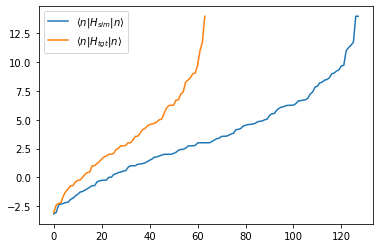

In [551]:
plt.plot(sens, label=r'$\langle n|H_{sim}|n\rangle$')
plt.plot(rens, label=r'$\langle n|H_{tgt}|n\rangle$')
plt.legend()

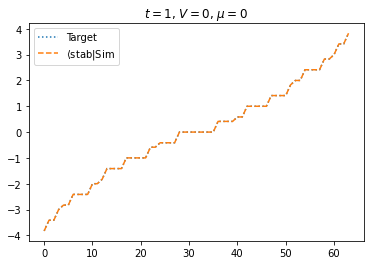

In [499]:
plt.plot(gex, ':', label=r'Target') #exact Hubbard energies
plt.plot(rens, '--',label=r'$\langle$stab$|$Sim')

plt.title(r'$t={}$, $V={}$, $\mu={}$'.format(T_PARAM,V_PARAM,MU_PARAM))
plt.legend()

In [500]:
for k in range(64):
    A = hub.state_occs(qu.basis_vec(i=k, dim=64))
    B = sql.state_local_occs(qstate=Uplus[:,k])
    assert np.allclose(A,B) #may not hold when degeneracies
sql.one_qubit_dm(Uplus@reigst[:,0], i=5)

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]

In [400]:
# reload(stab)
reload(dq)
# qlat = dq.SpinlessDense(Lx=3, Ly=3)
# Uplus = stab.two_qubit_codespace(qlat)
# Uplus.shape
# qlat = dq.SpinlessDense(Lx=4,Ly=3)
# Up3 = stab.three_qubit_stabilizer(qlat)
reload(hjw)
# reload(denseSpinhalf)

hubhalf = hjw.HubbardSpinhalfExact(Lx=1, Ly=4, t=1.0, U=0)
hubhalf.build_spinhalf_ham()
h2ex = hubhalf.HamExact()

dse = dq.DenseSpinhalf(Lx=1,Ly=4)
dse.make_simulator_ham(t=1.0, U=0)
H2 = dse.ham_sim()

np.array_equal(H2, h2ex)# np.array_equal(H2, h2ex)

True

In [451]:
reload(beeky)
reload(dq)

T_PARAM=1.0
V_PARAM=1.5
MU_PARAM=1.5

qlat = dq.SpinlessDense(Lx=2,Ly=3)
qlat.make_simulator_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)

qenet = beeky.QubitEncodeNet(qlat)
MyHam = beeky.SpinlessFermiSim(qlat, t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
tebd = beeky.iTimeTEBD(qenet, MyHam, compute_every=50)

ges, gst = qu.eigh(qlat.ham_sim())
print(ges[0])
# print('Naive:',qenet.compute_energy_deprec(T_PARAM, V_PARAM, MU_PARAM))

# print('<H>:  ',qenet.compute_ham_expec(MyHam))

# H_d = qlat.ham_sim()
# psi_d = qenet.net_to_dense()

# print('Dense:',(psi_d.H @ H_d @ psi_d)[0][0])


-7.157129005390433


n=1750, tau=0.01, energy~-7.156493: 100%|██████████| 400/400 [00:04<00:00, 80.33it/s]


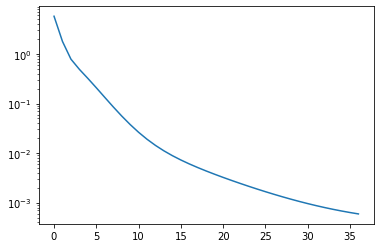

In [454]:
tebd.evolve(400)
plt.semilogy(np.array(tebd.energies) - ges[0])
# plt.hlines(xmin=0, xmax=300, y=-7.15712901)
# print(qenet.compute_ham_expec(MyHam))
# print(tebd._check_energy())
# qenet.check_dense_energy().item()

In [463]:
# fstate = tebd.qnet.net_to_dense() / (tebd.get_current_normsq()**0.5)
# diff = (fstate - gst[:,0]).reshape(-1)
np.linalg.norm(diff)

16.00000000000003

In [429]:
reload(beeky)
reload(dq)
T_PARAM = 1.4
U_PARAM = 0.9

# newlat = dq.SpinlessDense(Lx=1, Ly=4)
newlat = dq.DenseSpinhalf(Lx=1, Ly=4)

newHam = beeky.SpinhalfHubbardSim(newlat, t=T_PARAM, U=U_PARAM)

newnet = beeky.QubitEncodeNet.rand_network(newlat,phys_dim=4)

tebd2 = beeky.iTimeTEBD(newnet, newHam, compute_every=50)

# dse = denseSpinhalf.DenseSpinhalfEncoder(Lx=1, Ly=4)
# dse.make_simulator_ham(t=T_PARAM, U=U_PARAM)
# Hdense = dse.ham_sim()
# ens, est = qu.eigh(Hdense)
print(ens[0:3])
# psid = newnet.net_to_dense()
# print((psid.H @ Hdense @ psid).item())


[-5.42097074 -4.97826792 -4.97826792]


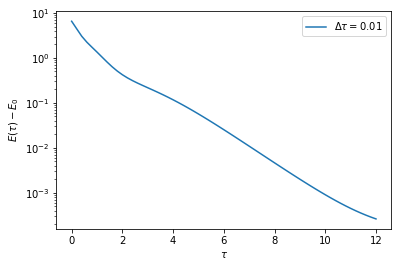

In [433]:
# tebd2.evolve(steps=500)
plt.semilogy(0.01* np.array(tebd2.iters), np.array(tebd2.energies)-ens[0] , label='$\\Delta\\tau=0.01$')
plt.xlabel('$\\tau$')
plt.ylabel('$E(\\tau)-E_0$')
plt.legend()

In [448]:
# np.linalg.norm(tebdstate/norm)
# diff = ((tebdstate/norm) - est[:,0]).reshape(-1,1).round(3)
# diff = diff.reshape(-1)
# where = diff.nonzero()
# diff[where]

# fstate = tebd2.qnet.net_to_dense()
# print(np.linalg.norm(fstate))
# print(tebd2.get_current_normsq()**0.5)
# print(tebd2.normsq**0.5)
# fstate1 = fstate/(tebd2.normsq**0.5)

# diff = (fstate1 - est[:,0]).reshape(-1)
diff[diff.round(3).nonzero()]
# np.linalg.norm(est[:,0])

[ 0.038098+0.j -0.098253+0.j  0.097819+0.j ...  0.097819+0.j -0.098253+0.j  0.038098+0.j]

In [761]:
reload(beeky)
reload(dq)
reload(stab)

qlat = dq.QubitCodeLattice(Lx=2, Ly=3, local_dim=2)
hstab = beeky.HamStab(qlat)
hstab.multiplier


-1.0

In [661]:
reload(stab)
reload(dq)

qlat = dq.SpinlessDense(Lx=2,Ly=3)
# code_dims = [2]*6
# sim_dims = [2]*7
U, Udag = stab.one_qubit_U_matrices(qlat, (0,1))
qlat.loop_stabilizer_data(0,1)

{'inds': [1, 2, 5, 4, 6], 'opstring': 'ZZZZX'}

In [787]:
reload(beeky)

trynet = beeky.QubitEncodeNet.rand_network(qlat, 2)
v1 = trynet.net_to_dense()
# Ud_psi = trynet.apply_gate(G=U@Udag, where=tuple(range(7)))
# v1 = U@Udag@trynet.net_to_dense()
projnet = beeky.QubitEncodeNet(qlat, trynet.apply_gate(G=U@Udag, where=tuple(range(7))))
v2 = projnet.net_to_dense()

# print(np.array_equal(U@Udag@v1,v2)) TRUE
print(trynet.compute_stab_expec(hstab))
print(projnet.compute_stab_expec(hstab))




(-0.14949302367939535+0j)
(-1+0j)


In [788]:
reload(beeky)
Hsim = beeky.SpinlessFermiSim(qlat, 1.0, 0.5, 0)
print(trynet.compute_ham_expec(Hsim))
print(trynet.compute_ham_expec2(Hsim))


(0.4199452850074444+3.096752455161722e-18j)
(0.41994528500744444+3.096752455161722e-18j)


In [692]:
Udnet.apply_stabilizer_gate_(qlat.loop_stabilizer_data(0,1))
v3=Udnet.net_to_dense()

<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>


In [693]:
np.array_equal(v2, v3)

True